In [13]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [2]:
project_path = "C:\\Users\\jolged\PycharmProjects\\Auto_Recognition2\\"
camera_url = 'https://eismoinfo.lt/eismoinfo-backend/camera-info-table/'
collection_path = project_path + '\\data\\collection\\'
os.makedirs(collection_path, exist_ok=True)

In [16]:
# Vaizdo kamerų sąrašas
camera_url = 'https://eismoinfo.lt/eismoinfo-backend/camera-info-table/'
cameras = pd.DataFrame(requests.get(camera_url).json())
cameras.head(2)

,id,name,roadName,roadNr,date,image,x,y,km
0,1167,Vilnius,Vilnius–Kaunas–Klaipėda,A1,1684080311000,https://www.eismoinfo.lt/eismoinfo-backend/ima...,576154,6056867,10.04
1,1165,Didžiulio ež.,Vilnius–Kaunas–Klaipėda,A1,1684080312000,https://www.eismoinfo.lt/eismoinfo-backend/ima...,568026,6061414,19.42


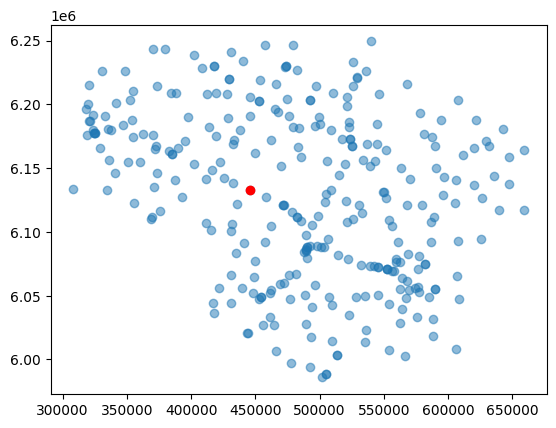

In [17]:
# Vaizdo kamerų išsidėstymas
plt.scatter(cameras['x'], cameras['y'], alpha=0.5)
plt.scatter(cameras[cameras['id']==364]['x'], cameras[cameras['id']==364]['y'], color='r')
plt.show()

In [22]:
# Duomenų surinkimo funkcija
def collect(camera_id, page_range, page_size, make_camera_dir):
    camera_path = collection_path

    if make_camera_dir:
        camera_path = collection_path + f"\\{camera_id}\\"
        os.makedirs(camera_path, exist_ok=True)

    for i in page_range:
        camera_batch = camera_url + f"{camera_id}?pageNumber={i}&pageSize={page_size}"
        response_batch = requests.get(camera_batch)
        if response_batch.status_code == 200:
            for i in range(len(response_batch.json()["info"])):
                response_image = requests.get(response_batch.json()["info"][i]["image"])
                date = response_batch.json()["info"][i]["date"]
                if response_image.status_code == 200:
                    with open(
                        camera_path
                        + str(camera_id)
                        + "_"
                        + datetime.utcfromtimestamp(date / 1000).strftime("%Y-%m-%d_%H%M%S")
                        + "_"
                        + str(response_batch.json()["info"][i]["id"])
                        + ".jpg",
                        "wb",
                    ) as f:
                        f.write(response_image.content)

In [24]:
collect(camera_id=364, page_range=range(30), page_size=30, make_camera_dir=True)